In [2]:
# basic python data handling analysis modules
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set()
import pickle, os, gc, re
# small utility functions
from utility import *

# interactive jupyter widgets!
# https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

%matplotlib inline

In [3]:
import shutil
import tempfile
import urllib.request
import gzip
import datetime
import json
import time

Dataset_directory = ".."+os.sep+"Datasets"+os.sep
tmdb_dir = create_subdir(Dataset_directory, "themoviedb")

In [5]:
# release_dates
release_dates = pd.read_msgpack( tmdb_dir+"release_dates"+".msgpack")

In [69]:
[x.keys() for x in release_dates.loc[601]["release_dates"]["results"]] 

[dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates']),
 dict_keys(['iso_3166_1', 'release_dates'])]

In [19]:
pd.DataFrame.from_dict( release_dates[0:10].apply(lambda x: x["release_dates"]["results"],axis=1).loc[601] ).loc[0]["release_dates"]

({'certification': '',
  'iso_639_1': '',
  'release_date': '1982-12-17T00:00:00.000Z',
  'type': 3},
 {'certification': '',
  'iso_639_1': '',
  'note': '20th anniversary edition',
  'release_date': '2002-03-29T00:00:00.000Z',
  'type': 3})

In [22]:
pd.DataFrame.from_dict( release_dates[0:10].apply(lambda x: x["release_dates"]["results"],axis=1).loc[601] )

,iso_3166_1,release_dates
0,FI,"({'certification': '', 'iso_639_1': '', 'relea..."
1,ZA,"({'certification': '', 'iso_639_1': '', 'note'..."
2,GR,"({'certification': 'PG', 'iso_639_1': '', 'not..."
3,SG,"({'certification': '', 'iso_639_1': '', 'note'..."
4,MK,"({'certification': '', 'iso_639_1': '', 'note'..."
5,EE,"({'certification': '', 'iso_639_1': '', 'note'..."
6,KW,"({'certification': '', 'iso_639_1': '', 'note'..."
7,CH,"({'certification': '', 'iso_639_1': '', 'note'..."
8,AU,"({'certification': 'G', 'iso_639_1': '', 'note..."
9,PE,"({'certification': '', 'iso_639_1': '', 'note'..."


In [98]:
flatten = lambda l: [item for sublist in l for item in sublist] 

In [104]:
release_dates.shape

(467917, 1)

In [108]:
df = release_dates

df = pd.DataFrame( flatten( [ [{**z,**{"id":x,"country":y['iso_3166_1']}} for z in y['release_dates']]  for x in df.index for y in df.loc[x,"release_dates"]["results"] ] ) )

In [118]:
df.replace("",np.nan,inplace=True)

In [119]:
df.columns

Index(['certification', 'country', 'id', 'iso_639_1', 'note', 'release_date',
       'type'],
      dtype='object')

In [121]:
df["certification"].value_counts()
# seems like you could dump a lot of shit just based on length

# get the 


12                                                   16652
NR                                                   14823
R                                                    13273
16                                                   12650
NC-17                                                12335
U                                                    11651
PG                                                    9968
18                                                    9174
15                                                    8450
PG-13                                                 6324
G                                                     6192
6                                                     5429
0                                                     4194
A                                                     2121
M                                                     2044
T                                                     2027
11                                                    19

In [122]:
df["country"].value_counts()

# country codes -> 

# 237 different countries?

US    191234
DE     53303
FR     43373
GB     38084
JP     19811
NL     19588
IT     18873
IN     15723
ES     15025
CA     14983
BR     14568
RU     12272
SE     10673
AU     10383
KR      8807
DK      8057
MX      6906
HK      6811
GR      6147
PT      5840
CZ      4632
TR      4524
AR      4506
PH      4462
HU      4454
PL      4353
FI      4301
BE      3645
CH      3569
CN      3473
       ...  
ST         3
SB         3
TL         3
GI         2
CK         2
TC         2
LR         2
TV         2
KN         2
VA         2
FK         2
BT         2
YT         2
SR         2
EH         2
YE         2
SJ         1
HM         1
TK         1
CX         1
NU         1
WS         1
CF         1
PN         1
FM         1
PW         1
MS         1
TO         1
GD         1
NR         1
Name: country, Length: 237, dtype: int64

In [170]:
# !pip install iso3166
from iso3166 import countries
two_letter_country_codes = [x.alpha2 for x in countries]


In [173]:
valid_countries = df["country"].apply(lambda x: x in two_letter_country_codes)
df[~valid_countries]["country"].value_counts()
# SU = Soviet Union
# XC = Ceuta?? but czech language?
# XG = Guernsey??? but German?
# CS = Serbia + montenegro
# YU = (former) Yugoslavia
# AN = Netherland Antilles => Curacao

# issues appear to be just "historical states"

SU    1947
XC     635
XG     212
CS     171
YU     138
AN       7
Name: country, dtype: int64

In [123]:
df["iso_639_1"].value_counts()
# language codes ->

# okay - clearly, a lot of non-acceptable codes!

en                       56089
de                       10199
fr                        9360
es                        7481
ja                        6262
it                        4880
ru                        4433
pt                        4058
zh                        2281
hi                        1872
tr                        1815
ko                        1805
cs                        1425
ml                        1349
ta                        1329
tl                        1191
id                        1190
nl                        1156
cn                        1121
sv                        1017
el                         994
xx                         900
ar                         900
pl                         874
hu                         794
fa                         791
da                         718
te                         716
fi                         519
uk                         486
                         ...  
assam                        1
yo      

In [185]:
!pip install iso639
import iso639


In [208]:
two_letter_language_codes = [x["iso639_1"] for x in iso639.data if x["iso639_1"]!=""]
two_letter_language_codes = two_letter_language_codes + ["cn","sh","xx","mo"]

In [211]:
df["iso_639_1"] = df["iso_639_1"].apply(lambda x: x.lower().strip() if pd.notnull(x) else np.nan)

df["iso_639_1"].replace("deutschland","de",inplace=True)
df["iso_639_1"].replace("ger","de",inplace=True)
df["iso_639_1"].replace("france","fr",inplace=True)
df["iso_639_1"].replace("français","fr",inplace=True)

df["iso_639_1"].replace("eng","en",inplace=True)
df["iso_639_1"].replace("english","en",inplace=True)
df["iso_639_1"].replace("engl","en",inplace=True)
df["iso_639_1"].replace("spanish","es",inplace=True)
df["iso_639_1"].replace("español","es",inplace=True)
df["iso_639_1"].replace("türkçe","tr",inplace=True)
df["iso_639_1"].replace("türkiye","tr",inplace=True)
df["iso_639_1"].replace("汉语","zh",inplace=True)
df["iso_639_1"].replace("mandarin","zh",inplace=True)
df["iso_639_1"].replace("한국어","ko",inplace=True)
df["iso_639_1"].replace("canada","en",inplace=True)
df["iso_639_1"].replace("dutch","nl",inplace=True)

df.loc[ df["iso_639_1"].apply(lambda x: x.lower() not in two_letter_language_codes if pd.notnull(x) else False), "iso_639_1" ] = np.nan
df["iso_639_1"].value_counts()

en    56133
de    10322
fr     9408
es     7500
ja     6262
it     4880
ru     4433
pt     4058
zh     2298
hi     1872
tr     1827
ko     1810
cs     1425
ml     1349
ta     1329
tl     1191
id     1190
nl     1160
cn     1121
sv     1017
el      994
ar      900
xx      900
pl      874
hu      794
fa      791
da      718
te      716
fi      519
uk      486
      ...  
rw        2
iu        2
fo        2
tg        2
so        2
sm        2
os        2
sg        2
rm        2
tk        2
mi        1
bm        1
qu        1
wo        1
yo        1
nn        1
ty        1
tw        1
lg        1
tt        1
sn        1
su        1
ln        1
ae        1
an        1
sd        1
oc        1
st        1
ki        1
sa        1
Name: iso_639_1, Length: 138, dtype: int64

In [132]:
df["type"] = df["type"].astype('uint8')
df["type"].value_counts()

# https://developers.themoviedb.org/3/movies/get-movie-release-dates
# Release dates support different types:

# 1. Premiere
# 2. Theatrical (limited)
# 3. Theatrical
# 4. Digital
# 5. Physical
# 6. TV

3    481388
5     41782
1     38019
6     26915
4     22746
2     11885
Name: type, dtype: int64

In [130]:
df["release_date"] = pd.to_datetime( df["release_date"] )
df["release_date"].sort_values()

# 463296    2049-02-16T00:00:00.000Z
# 47203     2072-03-30T00:00:00.000Z

342705   1874-12-09 00:00:00+00:00
235625   1878-06-14 00:00:00+00:00
528282   1881-01-01 00:00:00+00:00
455742   1883-11-19 00:00:00+00:00
450181   1884-01-01 00:00:00+00:00
587694   1885-01-01 00:00:00+00:00
524117   1886-12-31 00:00:00+00:00
614783   1886-12-31 00:00:00+00:00
594689   1887-01-01 00:00:00+00:00
605702   1887-01-01 00:00:00+00:00
618975   1887-01-31 00:00:00+00:00
573359   1887-02-01 00:00:00+00:00
618979   1887-02-01 00:00:00+00:00
573365   1887-02-01 00:00:00+00:00
618977   1887-02-01 00:00:00+00:00
578400   1887-03-09 00:00:00+00:00
450182   1887-06-01 00:00:00+00:00
215253   1887-08-18 00:00:00+00:00
384915   1888-01-01 00:00:00+00:00
170361   1888-01-01 00:00:00+00:00
363293   1888-05-31 00:00:00+00:00
64765    1888-10-14 00:00:00+00:00
64766    1888-10-15 00:00:00+00:00
384700   1889-01-01 00:00:00+00:00
87645    1889-01-14 00:00:00+00:00
384772   1890-01-01 00:00:00+00:00
88604    1890-01-01 00:00:00+00:00
305244   1890-01-01 00:00:00+00:00
415476   1890-03-09 

In [212]:
df.loc[463296]
# https://www.themoviedb.org/movie/434393-campus-sleuth
# release_date out by 100 years!

certification                            U
country                                 GB
id                                  434393
iso_639_1                               en
note                                   NaN
release_date     2049-02-16 00:00:00+00:00
type                                     3
Name: 463296, dtype: object

In [213]:
df.loc[47203]
# https://www.themoviedb.org/movie/10784-cabaret
# ditto, right year, wrong century!

certification                           15
country                                 SE
id                                   10784
iso_639_1                               en
note                                   NaN
release_date     2072-03-30 00:00:00+00:00
type                                     3
Name: 47203, dtype: object

In [250]:
df.loc[463296,"release_date"] = pd.to_datetime('1949-02-16', utc =True)
df.loc[47203 ,"release_date"] = pd.to_datetime('1972-03-30', utc =True)

In [251]:
df["certification"].value_counts()

12                                                   16652
NR                                                   14823
R                                                    13273
16                                                   12650
NC-17                                                12335
U                                                    11651
PG                                                    9968
18                                                    9174
15                                                    8450
PG-13                                                 6324
G                                                     6192
6                                                     5429
0                                                     4194
A                                                     2121
M                                                     2044
T                                                     2027
11                                                    19

In [291]:
df["certification"] = df["certification"].apply(lambda x: x.strip() if pd.notnull(x) else np.nan)
df["certification"].replace("pg","PG",inplace=True)
df["certification"].replace("PG13","PG-13",inplace=True)
df["certification"].replace("",np.nan,inplace=True)
df["certification"].replace('-',np.nan,inplace=True)
df["certification"].replace('전체관람가','ALL',inplace=True)
df["certification"].replace('15 år','15',inplace=True)
df["certification"].replace('保護級','6+',inplace=True)
df["certification"].replace('น 13+','13+',inplace=True)
df["certification"].replace('น 15+','15+',inplace=True)
df["certification"].replace('Б14','15+',inplace=True)



df.loc[ ~df["certification"].apply(lambda x: (x in unique_certification_codes) or (len(x)<6) if pd.notnull(x) else True) ,"certification"] = np.nan
df["certification"].value_counts()

12       16653
NR       14824
R        13274
16       12651
NC-17    12335
U        11652
PG       10008
18        9175
15        8490
PG-13     6501
G         6230
6         5429
0         4194
A         2122
M         2044
T         2027
11        1997
7         1844
AL        1698
UA        1691
14        1395
L         1348
16+       1270
MA15+     1099
12A       1062
M/12       916
18+        858
Btl        814
12+        796
13         752
         ...  
ni           1
K16          1
vimeo        1
MP           1
MPAA         1
Drama        1
FSK          1
Imbdb        1
t.o11        1
R13+         1
M21          1
Tutti        1
+17          1
short        1
aaa          1
QA           1
ab 18        1
ITA          1
ws           1
na           1
18-          1
13VL         1
7-9          1
0004         1
P15          1
BA           1
PG10         1
tr           1
dvd          1
Ex           1
Name: certification, Length: 524, dtype: int64

In [294]:
top_100 = df["certification"].value_counts().head(100).index
pd.Series(top_100).sort_values()

df.loc[ ~df["certification"].apply(lambda x: (x in unique_certification_codes) or (x in top_100) if pd.notnull(x) else True) ,"certification"] = np.nan
# df["certification"].apply()

In [295]:
df["certification"].value_counts()

12          16653
NR          14824
R           13274
16          12651
NC-17       12335
U           11652
PG          10008
18           9175
15           8490
PG-13        6501
G            6230
6            5429
0            4194
A            2122
M            2044
T            2027
11           1997
7            1844
AL           1698
UA           1691
14           1395
L            1348
16+          1270
MA15+        1099
12A          1062
M/12          916
18+           858
Btl           814
12+           796
13            752
            ...  
NC16           47
K-11           46
K-13           44
D              44
MA             44
PG12           42
R-16           37
II             36
I              34
R21            33
R-15           33
V              31
PG-12          31
15A            30
N-7            30
Públicos       29
XXX            28
KN             24
livre          22
Е16            20
N-18           19
Atp            19
UR             19
M/3            18
X18+      

In [298]:
df.describe(include='all')

,certification,country,id,iso_639_1,note,release_date,type
count,166568,622735,622735.000000,133991,57246,622735,622735.000000
unique,108,237,NaN,138,12374,38595,NaN
top,12,US,NaN,en,DVD,2006-01-01 00:00:00+00:00,NaN
freq,16653,191234,NaN,56133,5361,1960,NaN
first,NaN,NaN,NaN,NaN,NaN,1874-12-09 00:00:00+00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,2027-12-17 00:00:00+00:00,NaN
mean,NaN,NaN,275204.801691,NaN,NaN,NaN,3.159188
std,NaN,NaN,190037.100439,NaN,NaN,NaN,0.965319
min,NaN,NaN,2.000000,NaN,NaN,NaN,1.000000
25%,NaN,NaN,81416.500000,NaN,NaN,NaN,3.000000


In [300]:
df[["certification","country","iso_639_1","type"]] = df[["certification","country","iso_639_1","type"]].astype('category')

In [301]:
df.dtypes

certification               category
country                     category
id                             int64
iso_639_1                   category
note                          object
release_date     datetime64[ns, UTC]
type                        category
dtype: object

In [307]:
(df["certification"].str()+df["country"].str)[df["certification"].notnull()]

TypeError: unsupported operand type(s) for +: 'StringMethods' and 'StringMethods'

In [310]:
count_certs = df[['country', 'certification']][df["certification"].notnull()].apply(lambda x: '__'.join(x), axis=1)

In [314]:
df2 = df[df["certification"].notnull()].copy()

df2["count_certs"] = count_certs

top_x_count_certs = count_certs.value_counts().head(200).index
df2["count_certs"] = df2["count_certs"].apply(lambda x: x if x in top_x_count_certs else np.nan)
df2 = df2[df2["count_certs"].notnull()]
df2["count_certs"].value_counts()

US__NR          14303
US__R           12504
US__NC-17       12309
DE__12           6985
DE__16           5914
US__PG-13        5804
US__PG           5350
IN__U            4914
NL__12           4654
GB__15           4652
US__G            4148
DE__0            4087
DE__18           3988
FR__U            3980
NL__16           3673
DE__6            3145
GB__U            2380
NL__6            2166
IT__T            2017
GB__PG           2003
GB__18           1955
AU__M            1922
NL__AL           1690
IN__UA           1685
SE__15           1665
BR__14           1322
DK__A            1320
BR__L            1289
RU__16+          1246
DK__15           1183
                ...  
IN__G              33
TH__PG-13          33
HK__I              33
ES__X              32
KZ__15+            32
AT__12             32
IT__R              32
IE__15             32
AT__16             32
PH__R              31
TW__6+             31
NO__6              30
JP__PG-13          30
IE__15A            30
LT__N-7   

In [319]:
df2.shape, df.shape

((163262, 8), (622735, 7))

In [321]:
df3 = pd.get_dummies( df2["count_certs"] )
df3["id"] = df2["id"]

In [325]:
df4 = (df3.groupby("id").sum()>0).astype("int")

In [327]:
df4.corr()

,AR__13,AR__16,AR__ATP,AT__12,AT__16,AU__E,AU__G,AU__M,AU__MA15+,AU__PG,...,TH__R,TW__6+,US__G,US__NC-17,US__NR,US__PG,US__PG-13,US__R,US__X,US__XXX
AR__13,1.000000,-0.000581,-0.000721,0.046404,-0.000447,-0.000871,-0.002144,0.030330,0.001422,0.018770,...,-0.000613,0.047160,-0.005124,-0.009278,-0.007634,0.001880,0.022427,0.001530,-0.001569,-0.000387
AR__16,-0.000581,1.000000,-0.000702,-0.000436,-0.000436,-0.000847,-0.002086,0.012403,0.026529,-0.002423,...,-0.000596,-0.000429,-0.004987,-0.009031,-0.002296,-0.005624,-0.005718,0.035947,-0.001527,-0.000377
AR__ATP,-0.000721,-0.000702,1.000000,-0.000540,-0.000540,-0.001051,0.005578,-0.004198,-0.003163,0.004043,...,-0.000740,-0.000532,-0.002645,-0.011198,-0.012151,-0.002213,-0.007090,-0.010892,-0.001894,-0.000468
AT__12,0.046404,-0.000436,-0.000540,1.000000,-0.000335,-0.000652,-0.001606,0.017901,0.003432,0.003809,...,-0.000459,-0.000330,-0.003839,-0.006951,-0.007543,-0.004329,0.010706,-0.005001,-0.001175,-0.000290
AT__16,-0.000447,-0.000436,-0.000540,-0.000335,1.000000,-0.000652,-0.001606,0.001496,0.008828,-0.001865,...,-0.000459,-0.000330,-0.003839,-0.006951,-0.004294,-0.004329,0.003152,0.017887,-0.001175,-0.000290
AU__E,-0.000871,-0.000847,-0.001051,-0.000652,-0.000652,1.000000,-0.003124,-0.005070,-0.003820,-0.003629,...,-0.000893,-0.000642,-0.004537,-0.013523,-0.008824,-0.007108,-0.007267,-0.013154,-0.002287,-0.000565
AU__G,-0.002144,-0.002086,0.005578,-0.001606,-0.001606,-0.003124,1.000000,-0.012484,-0.009407,-0.007743,...,-0.002199,-0.001581,0.108013,-0.033299,-0.032036,0.040512,-0.020554,-0.032391,-0.005631,-0.001391
AU__M,0.030330,0.012403,-0.004198,0.017901,0.001496,-0.005070,-0.012484,1.000000,-0.014558,-0.014501,...,0.002423,0.051606,-0.029094,-0.053810,-0.051604,-0.014210,0.272346,0.069405,-0.009138,-0.002257
AU__MA15+,0.001422,0.026529,-0.003163,0.003432,0.008828,-0.003820,-0.009407,-0.014558,1.000000,-0.010927,...,0.009134,0.003549,-0.022488,-0.040720,-0.033251,-0.024919,-0.014916,0.189536,-0.006886,-0.001701
AU__PG,0.018770,-0.002423,0.004043,0.003809,-0.001865,-0.003629,-0.007743,-0.014501,-0.010927,1.000000,...,-0.002555,0.003929,-0.005848,-0.038680,-0.034307,0.164207,0.079711,-0.034748,-0.006541,-0.001615


In [328]:
%%time
def corrank(X):
    import itertools
    df = pd.DataFrame([[(i,j),X.loc[i,j]] for i,j in list(itertools.combinations(X.corr(), 2))],columns=['pairs','corr'])    
    print(df.sort_values(by='corr',ascending=False).dropna())

# naive_cross_corrs = data.corr()    
# pd.set_option('max_colwidth', 80)
corrank(df4.corr()) # prints a descending list of correlation pair (Max on top)

                        pairs      corr
4989     (BR__e 14, PT__e 14)  0.767657
4640     (BR__e 10, PT__e 10)  0.700669
4815     (BR__e 12, PT__e 12)  0.668140
1439         (AU__M, GB__12A)  0.340369
8092         (DK__11, SE__11)  0.318947
1500          (AU__M, NL__12)  0.299484
8399           (DK__7, SE__7)  0.289141
12270    (GB__12A, US__PG-13)  0.275377
7994        (DK__11, GB__12A)  0.273571
1560       (AU__M, US__PG-13)  0.272346
12210       (GB__12A, NL__12)  0.251431
8209         (DK__15, NL__16)  0.249648
1381          (AU__M, BR__12)  0.244468
7591         (DE__16, NL__16)  0.244139
1523        (AU__M, PT__M/12)  0.243931
1409          (AU__M, DK__11)  0.242229
1825         (AU__PG, GB__PG)  0.241271
11452        (FR__12, NL__16)  0.240685
1692      (AU__MA15+, NL__16)  0.240321
8055         (DK__11, NL__12)  0.239778
12204     (GB__12A, LT__N-13)  0.238655
12394         (GB__15, US__R)  0.237198
7433         (DE__12, NL__12)  0.236105
1631      (AU__MA15+, GB__15)  0.235274


In [329]:
# Needed for Factor Analysis
from sklearn import datasets
from sklearn.decomposition import PCA, IncrementalPCA, NMF, TruncatedSVD, FastICA, FactorAnalysis, SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\sklearn\decomposition\sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


number of iterations: 59


AttributeError: Unknown property figsize

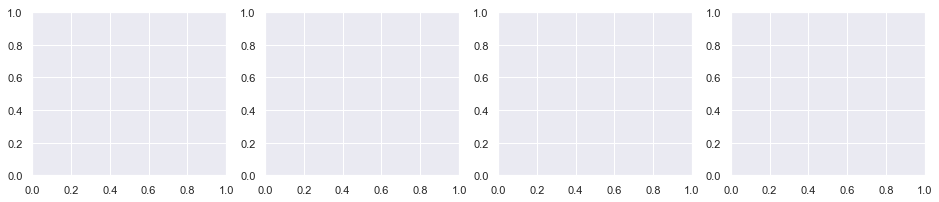

In [338]:
%%time

df_PCA = df4


output_subfolder = ".."+os.sep+"Output"+os.sep + "certifications_fusion" + os.sep
if not os.path.exists( output_subfolder ):
    os.makedirs( output_subfolder )
    

# standardise data (subtract out the mean, divide through by standard deviation)
clean_feature_set_std = StandardScaler().fit_transform(df_PCA.values )
BES_std = pd.DataFrame(      clean_feature_set_std,
                             columns = df_PCA.columns,
                             index   = df_PCA.index      )



n_components = BES_std.shape[1]
n_components = 10
alpha = 18
# decomp = FactorAnalysis(svd_method = 'lapack',n_components = n_components) ## ~10s ,n_components=30 -> 1.5 hrs
decomp = SparsePCA(n_components = n_components, alpha = alpha)
decomp_method = str(decomp).split("(")[0] 
# ,n_components=30

X_r = decomp.fit_transform(BES_std)

BES_decomp = pd.DataFrame(   X_r,
                             columns = range(0,n_components),
                             index   = df_PCA.index)



load_suff = "FactorAnalysis"
save = True # False => Load

if save & ( 'decomp' in globals() ): # SAVE    ##( 'decomp' not in globals() )
    decomp_method = str(decomp).split("(")[0] 
    subdir = output_subfolder + decomp_method
    fname = subdir+ os.sep + decomp_method


#display_pca_data(n_components, decomp, BES_std)



(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                          df_PCA.columns, BES_decomp, manifest=None, 
                                                          save_folder = subdir,  
                                                          show_first_x_comps= 10, show_histogram = True)

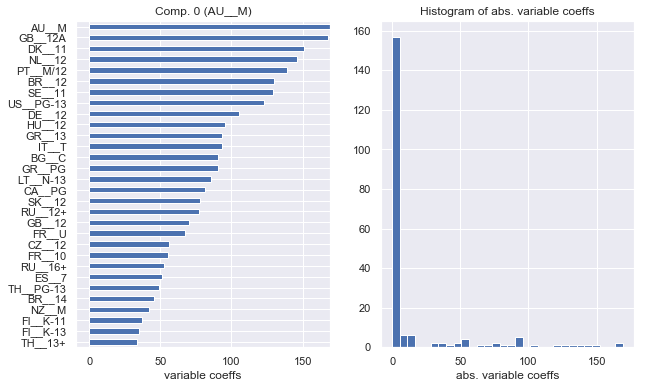

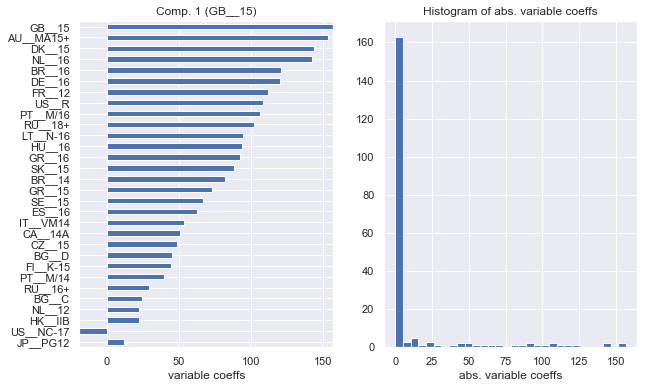

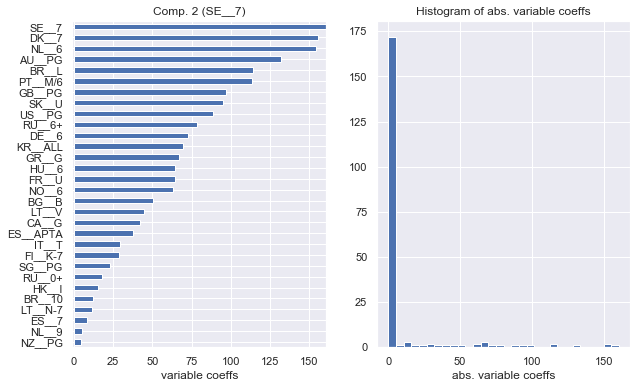

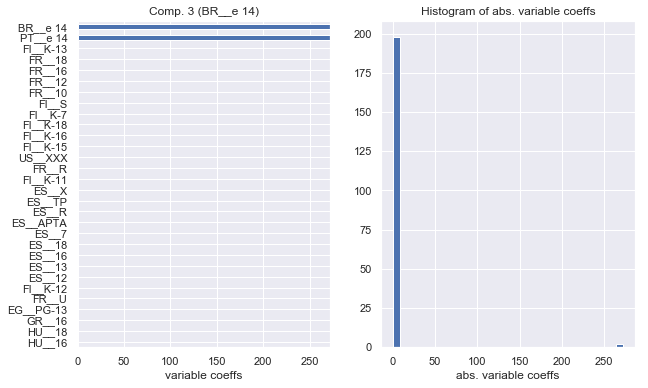

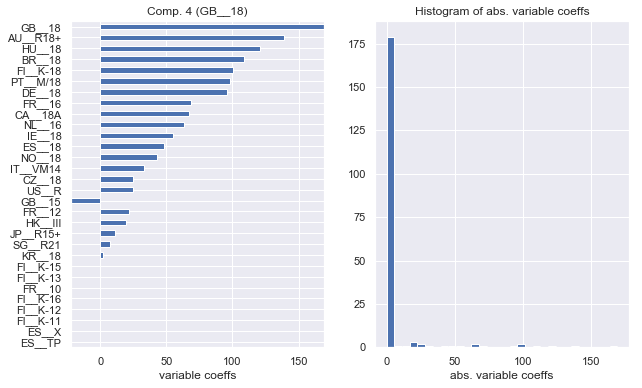

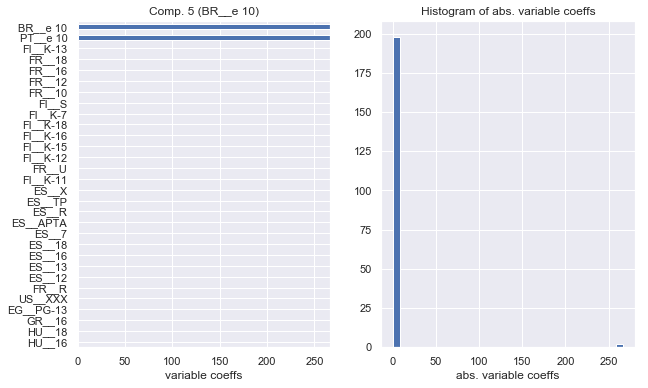

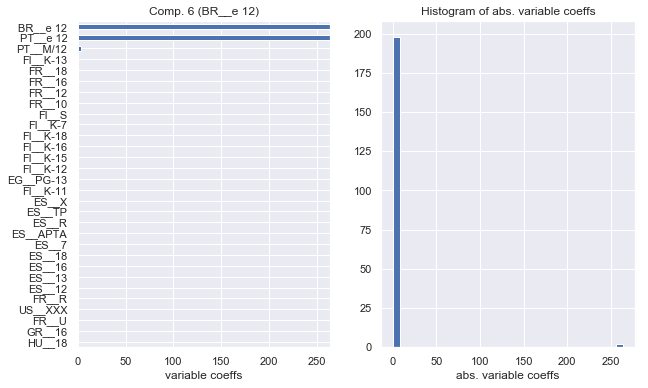

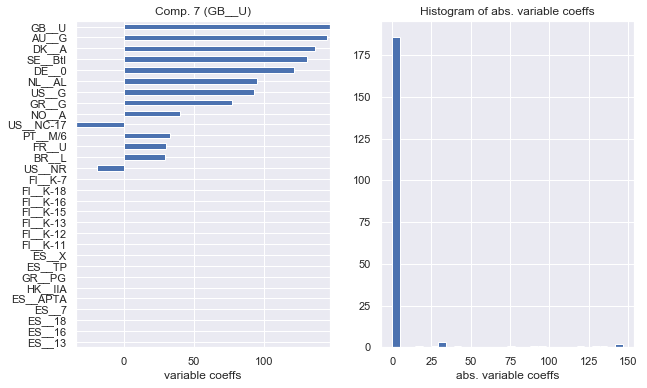

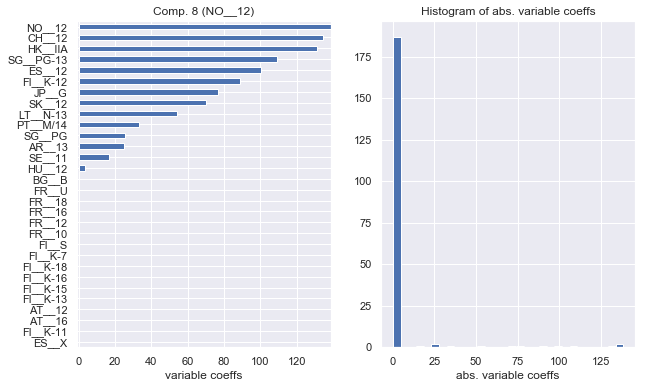

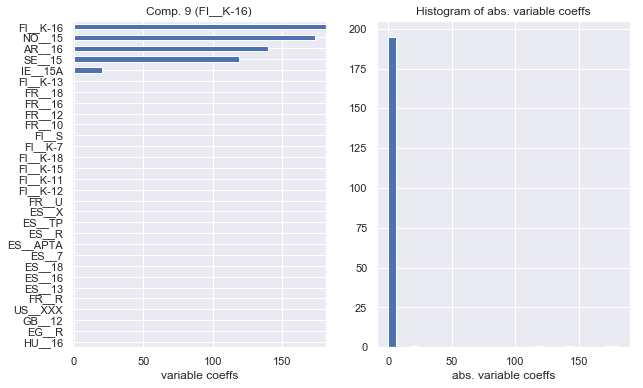

In [339]:
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                          df_PCA.columns, BES_decomp, manifest=None, 
                                                          save_folder = subdir,  
                                                          show_first_x_comps= 10, show_histogram = True)

In [133]:
import json
text_file = open(tmdb_dir+"my_api_key.txt", "r")
api_key = text_file.readlines()[0]

with urllib.request.urlopen("https://api.themoviedb.org/3/certification/movie/list?api_key="+api_key) as response:
    resp = response.readlines()

In [148]:
certifications = pd.DataFrame.from_dict( json.loads(resp[0])["certifications"] , orient='index')

In [160]:
certifications.loc["US",0:5].apply(lambda x: x["order"])

0    1
1    3
2    4
3    5
4    0
5    2
Name: US, dtype: int64

In [268]:
cert_df = certifications.applymap(lambda x: x["certification"] if pd.notnull(x) else np.nan)
cert_df

,0,1,2,3,4,5,6,7
US,G,PG-13,R,NC-17,NR,PG,NaN,NaN
CA,18A,G,PG,14A,A,NaN,NaN,NaN
AU,E,G,R18+,RC,PG,M,MA15+,X18+
DE,0,6,12,16,18,NaN,NaN,NaN
FR,U,12,10,16,18,NaN,NaN,NaN
NZ,M,13,15,G,PG,16,18,R
IN,U,UA,A,NaN,NaN,NaN,NaN,NaN
GB,15,R18,U,PG,12A,12,18,NaN
NL,AL,6,9,12,16,NaN,NaN,NaN
BR,L,10,12,14,16,18,NaN,NaN


In [ ]:
cert_df


In [259]:
unique_certification_codes = np.unique( certifications.applymap(lambda x: x["certification"] if pd.notnull(x) else np.nan).stack().values )

In [282]:
certifications.loc["FI",5]

{'certification': 'KK',
 'meaning': 'Banned from commercial distribution.',
 'order': 6}